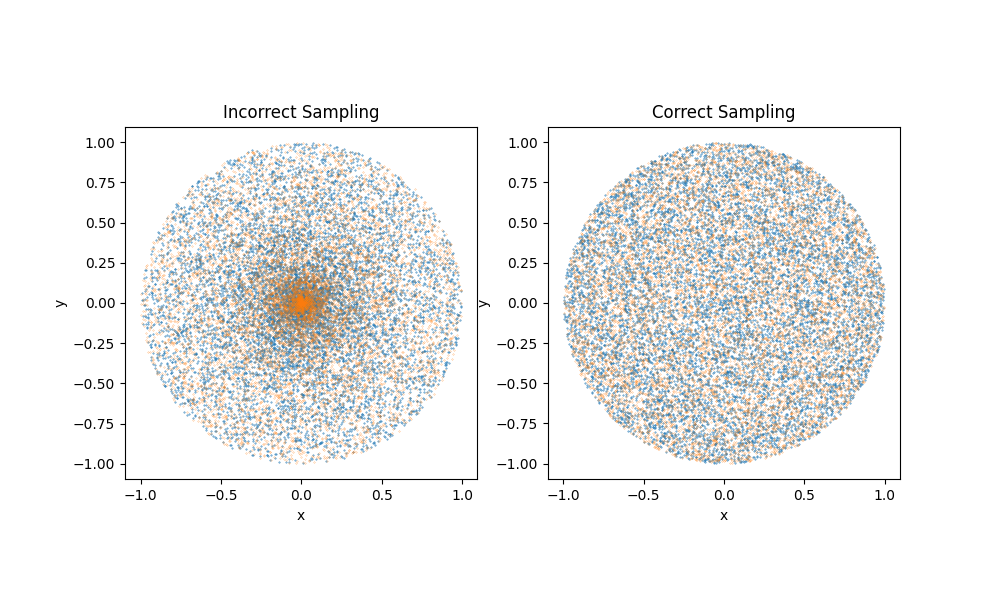

In [2]:
"""surface_sampling_circle.py"""
# Cell 1

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random
from matplotlib.markers import MarkerStyle

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget

plt.clf()

def plot_incorrect(ax: Axes) -> None:
    num_samples = 10000

    v: NDArray[np.float_] = np.linspace(0, 2 * np.pi, num_samples)  # toroidal angle
    r: NDArray[np.float_] = random.rand(num_samples)

    x: NDArray[np.float_] = r * np.cos(v)
    y: NDArray[np.float_] = r * np.sin(v)

    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    ax.scatter(x, y, marker=MarkerStyle("."), s=pixel_size)

    ax.set_title("Incorrect Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    ax.set_aspect("equal")


def plot_correct(ax: Axes) -> None:
    num_samples = 10000

    v: NDArray[np.float_] = np.linspace(0, 2 * np.pi, num_samples)  # toroidal angle
    r: NDArray[np.float_] = random.rand(num_samples)

    # TODO: Fix these next two lines
    x: NDArray[np.float_] = np.power(r,.5) * np.cos(v) 
    y: NDArray[np.float_] = np.power(r,.5) * np.sin(v) 
    
    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    ax.scatter(x, y, marker=MarkerStyle("."), s=pixel_size)

    ax.set_title("Correct Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    ax.set_aspect("equal")


def main() -> None:
    plt.figure(" ", figsize=(10, 6))
    plot_incorrect(plt.subplot(121))
    plot_correct(plt.subplot(122))
    plt.show()


main()

This process chooses a random ring and then some random point on said ring, all with equal probability. The problem with this approach is that each ring is equally probable.    
The chances of say 5 five points being selected from a ring with radius .5 is the same as 5 points from a ring of radius .1. The latter appears more bunched up, as such we must make it so that rings with larger radii apear more frequently than those with smaller radii.   
The way we accomplish this is by taking the array containing all posible rings and squishing the values towards the top. This is done by taking the square root of every element. Since every element is between 0 - 1 taking the square root will make them larger